In [8]:
# Step 1: Import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [9]:
# Step 2: Load Dataset
X_train = np.loadtxt('../../ass3/Training_data/input.csv', delimiter=',')
Y_train = np.loadtxt('../../ass3/Training_data/labels.csv', delimiter=',')

X_test = np.loadtxt('../../ass3/Testing_data/input_test.csv', delimiter=',')
Y_test = np.loadtxt('../../ass3/Testing_data/labels_test.csv', delimiter=',')

# import tensorflow_datasets as tfds

# # Load the dataset
# dataset, info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], 
#                          as_supervised=True, with_info=True)
# # Split into train and test
# train_dataset, test_dataset = dataset

# # Convert to numpy arrays (similar to your CSV structure)
# X_train, Y_train = [], []
# X_test, Y_test = [], []

# for image, label in tfds.as_numpy(train_dataset):
#     X_train.append(image)
#     Y_train.append(label)

# for image, label in tfds.as_numpy(test_dataset):
#     X_test.append(image)
#     Y_test.append(label)

# # Convert to numpy arrays
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_test = np.array(X_test)
# Y_test = np.array(Y_test)

# print("Training data shape:", X_train.shape)
# print("Testing data shape:", X_test.shape)
# print("Training labels shape:", Y_train.shape)

In [10]:
X_train.shape

(2000, 30000)

In [12]:
X_test.shape

(400, 30000)

In [13]:
Y_train.shape

(2000,)

In [7]:
# Step 3: Reshape into images (100x100 RGB)
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

In [26]:
# Labels reshape
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

In [27]:
# Step 4: Normalize image pixels (0–1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
# Step 5: Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [29]:
# # Show one random image
# idx = random.randint(0, len(X_train)-1)
# plt.imshow(X_train[idx])
# plt.title("Example Training Image")
# plt.show()

In [30]:
# Step 6: Build CNN Model
model = Sequential()

In [31]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   # binary output

In [32]:
# Step 7: Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
# Step 8: Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.5189 - loss: 0.8424 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5452 - loss: 0.6918 - val_accuracy: 0.5300 - val_loss: 0.6900
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5468 - loss: 0.6873 - val_accuracy: 0.5950 - val_loss: 0.6794
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5898 - loss: 0.6712 - val_accuracy: 0.6275 - val_loss: 0.6572
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6494 - loss: 0.6388 - val_accuracy: 0.5975 - val_loss: 0.6482
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6490 - loss: 0.6245 - val_accuracy: 0.6400 - val_loss: 0.6232
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7094 - loss: 0.5796 - val_accuracy: 0.6350 - val_loss: 0.6197
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7220 - loss: 0.5487 - val_accuracy: 0.6725 - v

In [34]:
# Step 9: Evaluate the model
loss, acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7464 - loss: 0.5005
Test Accuracy: 0.6175000071525574
Test Loss: 0.64945387840271


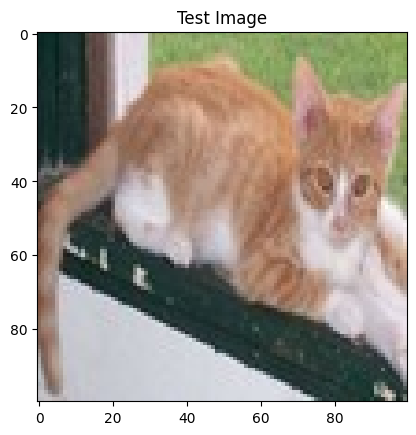

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Our model says it is a: Cat


In [35]:
# Step 10: Making predictions
idx2 = random.randint(0, len(Y_test)-1)
plt.imshow(X_test[idx2])
plt.title("Test Image")
plt.show()
y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))
y_pred = y_pred > 0.5   # threshold at 0.5

if y_pred == 0:
    pred = "Dog"
else:
    pred = "Cat"

print("Our model says it is a:", pred)